## CAB420 Final Assignment


# Importing Library and Read Data from CSV files


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

# Spliting data to trainning and testing set
from sklearn.model_selection import train_test_split
# Fitting Multiple Linear Regression to the trainning set
from sklearn.linear_model import LinearRegression, Lasso

from sklearn.metrics import mean_squared_error, r2_score

## Data Preprocessing

In [2]:
# Import dataset
rating_dataset = pd.read_csv("./data/ratings.csv")
movies_dataset = pd.read_csv("./data/movies.csv")

# Set the index by movieId, This line of code only able to execute once
movies_dataset.set_index('movieId', inplace = True)

# Convert genres to dummy variable dataset
# movies_genres_dummy <- a dataframe contains the genres values for all the movies and using movieId as index
movies_genres_dummy = movies_dataset['genres'].str.get_dummies(sep='|')
# Remove (no genres listed) from dummy because all 0 can represent (no genres listed)
movies_genres_dummy = movies_genres_dummy.drop(columns=["(no genres listed)"], axis=1)


# Use this If you think you are able to work on the years 
# Cannot use year as parameter because in movie 3xxxx there is a movie does not have years
# movies_dataset["year"] = movies_dataset["title"].str.extract(r"\(([0-9]+)\)").astype(dtype=np.int)

# Pre Processing for KMeans Algorithm finding the similar movies
movies_dataset = movies_dataset.drop(columns=["genres"], axis=1)
movies_dataset = pd.merge(movies_dataset, movies_genres_dummy, on = 'movieId', how = "left")

movies_dataset

,title,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
movieId,,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,Jumanji (1995),0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,Grumpier Old Men (1995),0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,Waiting to Exhale (1995),0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
5,Father of the Bride Part II (1995),0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,Heat (1995),1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
7,Sabrina (1995),0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
8,Tom and Huck (1995),0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,Sudden Death (1995),1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Combine Rating and Movie Dataset to one Dataset

In [3]:
full_rating_dataset = pd.merge(rating_dataset[["userId","movieId","rating"]], movies_genres_dummy, on = 'movieId', how = "left")
full_rating_dataset

,userId,movieId,rating,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,1,4.0,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,3,4.0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
2,1,6,4.0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,1,47,5.0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,1,50,5.0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0
5,1,70,3.0,1,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
6,1,101,5.0,0,1,0,0,1,1,0,...,0,0,0,0,0,1,0,0,0,0
7,1,110,4.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
8,1,151,5.0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
9,1,157,5.0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


## Linear Regression for Predicting a user how many marks will he/she giving to a movie according to he/she previous rating to other movie and the others how they rate this movie


In [4]:
X_df = full_rating_dataset.drop(columns=['rating','movieId'], axis=1)
y_df = full_rating_dataset.iloc[:,2]

X = X_df.values
y = y_df.values

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

regressor = LinearRegression()
regressor.fit(X_train,y_train)

y_pred = regressor.predict(X_test)

y_pred.round()

array([4., 3., 3., ..., 4., 3., 3.])

In [5]:
y_test

array([4.5, 3. , 3. , ..., 4.5, 3. , 3. ])

In [7]:
regressor.score(X_test,y_test)

0.044662990586502915

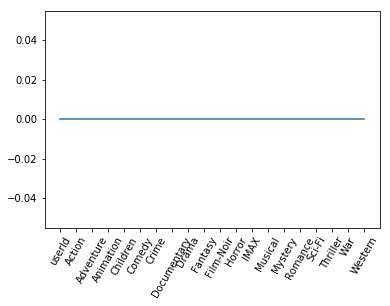

In [8]:
lasso = Lasso(alpha = 0.1, normalize = True)
lasso.fit(X,y)
lasso_coef = lasso.coef_

columns = X_df.columns

plt.plot(range(len(columns)),lasso_coef)
plt.xticks(range(len(columns)), columns.values, rotation = 60)
plt.show()

In [9]:
# The coefficients
print('Coefficients: \n', regressor.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))

Coefficients: 
 [-2.78812516e-04 -1.22037010e-01  1.04131942e-01  3.35995180e-01
 -2.72306558e-01 -1.28200001e-01  2.13193385e-01  3.69731926e-01
  1.94055687e-01  4.26721260e-02  2.35369317e-01 -1.77342457e-01
  9.75925175e-02  8.36770540e-02  1.10680260e-01  2.15526856e-02
  3.44916289e-02 -4.83091842e-02  2.64703975e-01  1.07404490e-01]
Mean squared error: 1.05
Variance score: 0.04


In [10]:
# Add 1 to Xtrain represent parameter0
X_train = np.append(arr = np.ones(( X_train.shape[0],1 )), values = X_train, axis = 1)

In [11]:
X_opt = X_train[:,:]

# Backward Elimination
import statsmodels.api as smf

regressor_OLS = smf.OLS(endog= y_train, exog= X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.041
Model:                            OLS   Adj. R-squared:                  0.041
Method:                 Least Squares   F-statistic:                     171.8
Date:                Sat, 25 May 2019   Prob (F-statistic):               0.00
Time:                        22:55:15   Log-Likelihood:            -1.1602e+05
No. Observations:               80668   AIC:                         2.321e+05
Df Residuals:                   80647   BIC:                         2.323e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.5143      0.013    274.852      0.000       3.489       3.539
x1            -0.0003   1.97e-05    -14.180      0.000      -0.000      -0.000
x2            -0.1220      0.010    -12.511      0.000      -0.141      -0.103
x3             0.1041      0.010     10.193      0.000       0.084       0.124
x4             0.3360      0.019     17.979      0.000       0.299       0.373
x5            -0.2723      0.017    -15.955      0.000      -0.306      -0.239
x6            -0.1282      0.009    -14.011      0.000      -0.146      -0.110
x7             0.2132      0.011     19.610      0.000       0.192       0.235
x8             0.3697      0.034     10.947      0.000       0.304       0.436
x9             0.1941      0.009     21.661      0.000       0.176       0.212
x10            0.0427      0.012      3.475      0.001       0.019       0.067
x11            0.2354      0.040      5.903      0.000       0.157       0.314
x12           -0.1773      0.015    -11.922      0.000      -0.206      -0.148
x13            0.0976      0.019      5.183      0.000       0.061       0.134
x14            0.0837      0.020      4.284      0.000       0.045       0.122
x15            0.1107      0.015      7.575      0.000       0.082       0.139
x16            0.0216      0.010      2.131      0.033       0.002       0.041
x17            0.0345      0.011      3.164      0.002       0.013       0.056
x18           -0.0483      0.010     -4.889      0.000      -0.068      -0.029
x19            0.2647      0.018     15.052      0.000       0.230       0.299
x20            0.1074      0.027      4.030      0.000       0.055       0.160
==============================================================================
Omnibus:                     4333.607   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5061.436
Skew:                          -0.606   Prob(JB):                         0.00
Kurtosis:                       3.187   Cond. No.                     4.17e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.17e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Linear Regression for predicting a user will rate to a new movies according to the previous rating he gave to the other movies only

In [12]:
# Randomly Generate a user for doing linear regression to predict what will he / she giving the rating on a movie
userID = random.randint(1, full_rating_dataset['userId'].max() + 1)

rating_df_for_one_user = full_rating_dataset.loc[(full_rating_dataset.userId == userID)]

X_df = rating_df_for_one_user.drop(columns=['rating','userId','movieId'], axis=1)
X = X_df.values

y_df = rating_df_for_one_user.iloc[:,2]
y = y_df.values

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

regressor = LinearRegression()
regressor.fit(X_train,y_train)

y_pred = regressor.predict(X_test)

y_pred.round()

array([3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 4., 3., 3., 3., 3., 3.,
       3., 3., 3., 4., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 4., 3., 3., 4., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 4., 3., 3., 3., 3., 3., 3., 3., 3.])

In [13]:
y_test

array([2.5, 3.5, 4. , 3.5, 2.5, 2.5, 3. , 2. , 2.5, 1.5, 4. , 4. , 4. ,
       3. , 4. , 4.5, 4. , 3. , 4. , 4. , 2.5, 2.5, 3.5, 3. , 3. , 4. ,
       3.5, 3. , 4. , 1.5, 1. , 2.5, 2.5, 1.5, 3.5, 3. , 3. , 2. , 3. ,
       2.5, 4. , 3.5, 3.5, 3.5, 4. , 4. , 3. , 3. , 3. , 3. , 2.5, 4.5,
       2.5, 2.5, 3.5, 2. , 3.5, 3.5, 3.5, 2.5, 3.5, 3. , 3.5, 3. , 1.5,
       2. , 2.5, 4.5, 2. , 3. , 4.5, 3. , 5. , 4. , 3. , 2. , 3.5, 2.5,
       3. , 4. , 4.5, 3.5, 2. , 3. , 3. , 2. , 3. , 3.5, 3. , 3. , 2. ,
       4.5, 3.5, 2.5, 2.5, 3. , 2. , 4. , 5. , 2.5, 4. , 3.5, 3.5, 4. ,
       3. , 3.5, 4. , 5. , 3. , 3. , 2.5, 3. , 3. , 2. ])

In [14]:
# The coefficients
print('Coefficients: \n', regressor.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))

Coefficients: 
 [ 0.00390509  0.02779142  0.39422336 -0.30439988 -0.31656674  0.10677852
 -0.24502303 -0.08232883 -0.05410787 -0.01437724 -0.11888551  0.68042319
  0.33820149 -0.01709754 -0.1271491   0.17655214 -0.15230937  0.33830039
  0.17764721]
Mean squared error: 0.64
Variance score: 0.05


In [15]:
# Add 1 to Xtrain represent parameter0
X_train = np.append(arr = np.ones(( X_train.shape[0],1 )), values = X_train, axis = 1)

X_opt = X_train[:,:]

# Backward Elimination
import statsmodels.api as smf

regressor_OLS = smf.OLS(endog= y_train, exog= X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.078
Model:                            OLS   Adj. R-squared:                  0.037
Method:                 Least Squares   F-statistic:                     1.929
Date:                Sat, 25 May 2019   Prob (F-statistic):             0.0109
Time:                        22:55:15   Log-Likelihood:                -517.60
No. Observations:                 456   AIC:                             1075.
Df Residuals:                     436   BIC:                             1158.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0419      0.124     24.468      0.000       2.798       3.286
x1             0.0039      0.092      0.042      0.966      -0.177       0.185
x2             0.0278      0.110      0.253      0.800      -0.188       0.243
x3             0.3942      0.437      0.902      0.368      -0.465       1.253
x4            -0.3044      0.476     -0.640      0.523      -1.240       0.631
x5            -0.3166      0.110     -2.880      0.004      -0.533      -0.101
x6             0.1068      0.095      1.127      0.260      -0.079       0.293
x7            -0.2450      0.600     -0.409      0.683      -1.424       0.934
x8            -0.0823      0.100     -0.823      0.411      -0.279       0.114
x9            -0.0541      0.167     -0.324      0.746      -0.382       0.274
x10           -0.0144      0.325     -0.044      0.965      -0.653       0.624
x11           -0.1189      0.188     -0.633      0.527      -0.488       0.250
x12            0.6804      0.282      2.411      0.016       0.126       1.235
x13            0.3382      0.559      0.604      0.546      -0.761       1.438
x14           -0.0171      0.124     -0.138      0.890      -0.260       0.226
x15           -0.1271      0.152     -0.835      0.404      -0.426       0.172
x16            0.1766      0.109      1.625      0.105      -0.037       0.390
x17           -0.1523      0.088     -1.728      0.085      -0.326       0.021
x18            0.3383      0.132      2.556      0.011       0.078       0.598
x19            0.1776      0.182      0.975      0.330      -0.180       0.536
==============================================================================
Omnibus:                        0.596   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.742   Jarque-Bera (JB):                0.705
Skew:                          -0.041   Prob(JB):                        0.703
Kurtosis:                       2.826   Cond. No.                         25.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
X_df

,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
4194,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
4195,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
4196,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0
4197,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
4198,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4199,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0
4200,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
4201,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0
4202,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4203,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [17]:
regressor.score(X_test,y_test)

0.04896721240933577

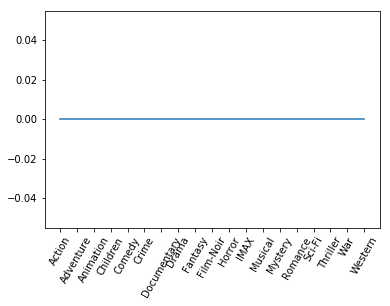

In [18]:
lasso = Lasso(alpha = 0.1, normalize = True)
lasso.fit(X_test,y_test)
lasso_coef = lasso.coef_

columns = X_df.columns.values
columns

plt.plot(range(len(columns)),lasso_coef)
plt.xticks(range(len(columns)), columns, rotation = 60)
plt.show()

## K-Means Algorithm Predicting Similar Movies

In [24]:
# The dataset will use in this case
movies_dataset

,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
movieId,,,,,,,,,,,,,,,,,,,
1,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
7,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
8,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


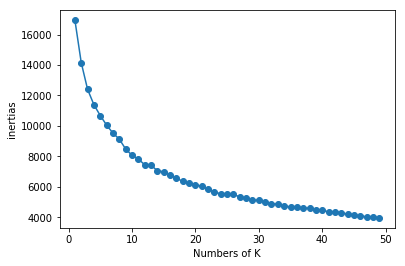

In [25]:
X = movies_dataset.iloc[:,1:].values
from sklearn.cluster import KMeans

Ks = range(1,50)
inertias = []

for k in Ks:
    model = KMeans(n_clusters = k)
    model.fit(X)
    inertias.append(model.inertia_)

plt.ylabel("inertias")
plt.xlabel("Numbers of K")
plt.plot(Ks,inertias,'-o')

## We Can see the result from the graph. The numbers of Inertias are dramatically decreased when k= 1 to k = 20, from 16000 to 6000. Then it becomes slow, from 6000 to 4000 when k = 21 to k=50. We should choose K = 20 in this case


In [28]:
model = KMeans(n_clusters = 20)
model.fit(X)
labels = model.predict(X)

movies_dataset['cluster'] = labels

movies_dataset.sort_values(by=['cluster']).to_csv("MovieCluster.csv")
